In [ ]:
#!pip install torch torchvision -U

In [ ]:
import torch
import yfinance as yf
import pandas as pd
import numpy as np
from copy import deepcopy as dc
import matplotlib.pyplot as plt

## DATA IMPORT

In [ ]:
companies = ["AAPL", "MSFT", "AMZN", "BA"]
#multi_data = yf.download(companies, start="2024-04-05", end="2024-04-12") #sample companies

dowjones_comps = [
    "AAPL", "MSFT", "AMZN", "GOOGL",  # Big Tech # "FB"
    "JNJ", "PFE", "MRK", "UNH", "ABT",      # Healthcare
    "PG", "KO", "PEP", "WMT", "HD",         # Consumer
    "GS", "JPM", "V", "AXP", "CRM",         # Financials
    "DIS", "NFLX", "CMCSA", "T", "INTC",    # Media & Telecom
    "NKE", "MCD", "SBUX", "CAT", "MMM",     # Industrials
    "BA", "HON", "UNP", "DOW",       # Industrials #"UTX"
    "IBM", "CSCO", "AAP", "TRV", "CVX",     # Other
    "XOM", "VZ", "MS", "RTX", "WBA"         # Other
]

multi_data = yf.download(dowjones_comps, start="2021-04-05", end="2024-04-05")

[*********************100%%**********************]  43 of 43 completed


In [ ]:
pd.DataFrame(multi_data)

Price        Adj Close                                                  \
Ticker             AAP        AAPL         ABT        AMZN         AXP   
Date                                                                     
2021-04-05  169.531845  123.742043  113.158669  161.336502  140.476669   
2021-04-06  169.920441  124.046730  113.262512  161.190994  140.563248   
2021-04-07  168.967438  125.707779  113.394684  163.969498  141.505814   
2021-04-08  167.005920  128.125595  113.083138  164.964996  141.419205   
2021-04-09  170.216553  130.720322  114.140518  168.610001  142.130966   
...                ...         ...         ...         ...         ...   
2024-03-28   84.817093  171.479996  113.099098  180.380005  226.986740   
2024-04-01   85.156006  170.029999  111.536835  180.970001  226.906982   
2024-04-02   83.650848  168.839996  111.467178  180.690002  224.833405   
2024-04-03   83.890083  169.649994  110.730835  182.410004  225.930008   
2024-04-04   79.005798  168.820007  109.566612  180.000000  219.589996   

Price                                                                 ...  \
Ticker              BA         CAT      CMCSA         CRM       CSCO  ...   
Date                                                                  ...   
2021-04-05  259.359985  218.536285  50.467194  220.002609  47.867191  ...   
2021-04-06  255.169998  215.665604  50.735497  220.801575  47.520134  ...   
2021-04-07  252.580002  215.450531  50.513451  220.501953  47.282673  ...   
2021-04-08  254.949997  215.515976  50.263664  224.157181  47.410530  ...   
2021-04-09  252.360001  215.768433  49.560547  230.978271  47.574921  ...   
...                ...         ...        ...         ...        ...  ...   
2024-03-28  192.990005  365.099121  43.032154  301.179993  49.505543  ...   
2024-04-01  189.500000  362.418884  41.969997  302.260010  49.634491  ...   
2024-04-02  188.039993  363.504913  41.810001  304.000000  48.959999  ...   
2024-04-03  184.919998  374.425140  41.529999  304.739990  48.740002  ...   
2024-04-04  183.289993  368.446930  41.110001  294.140015  48.110001  ...   

Price        Volume                                                            \
Ticker         SBUX         T      TRV       UNH      UNP         V        VZ   
Date                                                                            
2021-04-05  6913100  50996905  1260700   2709400  1958400  10440500  14326300   
2021-04-06  6745200  44574314  1349200   2698600  1590800   7828100  12198300   
2021-04-07  5629600  53821262  1694200   2158900  1634200   5614300  13218400   
2021-04-08  5011300  66037678  1740700   2426700  1983900  11042000  16472400   
2021-04-09  4114300  44111311  1377600   2483200  2383700   5724900  13872000   
...             ...       ...      ...       ...      ...       ...       ...   
2024-03-28  6784300  33461500   871100   3820000  2265900   5844400  19771400   
2024-04-01  4990200  31980100   801300   2928700  2493800   5084000  15031600   
2024-04-02  8276800  40169500  1115800  11867000  2019400   6912300  17260800   
2024-04-03  6316400  38155900   856600   4460400  2097200   4536600  18211800   
2024-04-04  8057600  31850300  1212000   5182000  2062500   4018600  16461400   

Price                                     
Ticker           WBA       WMT       XOM  
Date                                      
2021-04-05   6142100  40043100  23264800  
2021-04-06   4807700  31044600  18926300  
2021-04-07   4315500  20361600  22385000  
2021-04-08   5879800  19095600  21999300  
2021-04-09   5310000  20676600  20020700  
...              ...       ...       ...  
2024-03-28  32886800  17535100  18482100  
2024-04-01  36186100  13837600  13817000  
2024-04-02  28791400  19510100  19919600  
2024-04-03  21358500  14615100  16504300  
2024-04-04  14574400  14436100  18467400  

[756 rows x 258 columns]

In [ ]:
multi_data.values

array([[1.69531815e+02, 1.23742043e+02, 1.13158661e+02, ...,
        6.14210000e+06, 4.00431000e+07, 2.32648000e+07],
       [1.69920425e+02, 1.24046722e+02, 1.13262497e+02, ...,
        4.80770000e+06, 3.10446000e+07, 1.89263000e+07],
       [1.68967468e+02, 1.25707787e+02, 1.13394684e+02, ...,
        4.31550000e+06, 2.03616000e+07, 2.23850000e+07],
       ...,
       [8.36508484e+01, 1.68839996e+02, 1.11467178e+02, ...,
        2.87914000e+07, 1.95101000e+07, 1.99196000e+07],
       [8.38900833e+01, 1.69649994e+02, 1.10730835e+02, ...,
        2.13585000e+07, 1.46151000e+07, 1.65043000e+07],
       [7.90057983e+01, 1.68820007e+02, 1.09566612e+02, ...,
        1.45744000e+07, 1.44361000e+07, 1.84674000e+07]])

In [ ]:
#1 version formating
md_values = multi_data.values

# Get the shape of the original array
rows, cols = md_values.shape
num_companies = len(dowjones_comps)
num_features = 6

# Reshape the array to reorder it by [date, company, features]
values_3d = md_values.reshape(rows, num_companies, num_features)
#values_3d

In [ ]:
#data normalization/scaling?
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
multi_data = scaler.fit_transform(multi_data)

In [ ]:
#2 version formating
#md_values = multi_data.values
rows, cols = multi_data.shape
num_companies = len(dowjones_comps)
values_3d = md_values.reshape(rows, int(cols/num_companies), num_companies)
#values_3d # [ Date_idx, PriceCol_idx, CompanyCol_idx]

In [ ]:
X = values_3d[:, 1:]
y = values_3d[:, 0]

split_index = int(len(X) * 0.95)
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]


X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X.shape, y.shape

((756, 5, 43), (756, 43))

In [ ]:
tensor_3d = torch.tensor(values_3d)
input = tensor_3d.to(torch.float32)
tensor_3d.size()

torch.Size([756, 6, 43])

In [ ]:
tensor_3d

NameError: name 'tensor_3d' is not defined

In [ ]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## LTSM MODELING

In [ ]:
# switch to using GPU?

# Make model
rnn = torch.nn.LSTM(43, 20, 2) #self, input_size(num ), hidden_size, num_stacked_layers

h0 = torch.randn(2, 6, 20) #inital hidden state, default is zero
c0 = torch.randn(2, 6, 20) #inital cell state, default is zero
output, (hn, cn) = rnn(input, (h0, c0))

## Kara's work

In [ ]:
# make model
class LSTM(torch.nn.Module):
  def __init__(self, input_size, hidden_size, stacked_size):
    super().__init__()
    self.hidden_size = hidden_size
    self.stacked_size = stacked_size
    self.lstm = torch.nn.LSTM(input_size, hidden_size, stacked_size, batch_first=True)
    self.fc = torch.nn.Linear(hidden_size, 1) # fc is fully connected layer, the 1 for predicting final/closing value


  def forward(self, x):
    batch_size = x.size(0)
    h0 = torch.zeros(self.stacked_size, batch_size, self.hidden_size)
    c0 = torch.zeros(self.stacked_size, batch_size, self.hidden_size)
    out, (hn, cn) = self.lstm(x, (h0, c0))
    out = self.fc(out[:, -1, :])
    return out


model = LSTM(43, 30, 6) #size of data ex: [5, 6, 4] [Date_idx, PriceCol_idx, CompanyCol_idx]

In [ ]:
# now train model
def train_epoch():
  model.train(True)
  print(f'Epoch: {epoch + 1}')
  running_loss = 0.0

  for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0], batch[1]

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch_index+1) %10 == 0:  # print every 100 batches
          avg_loss_across_batches = running_loss / 100
          print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
          running_loss = 0.0
  print()

In [ ]:
def validate_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0], batch[1]

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [ ]:
loss_function  = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) #could use Adam
epoch_size = 300

for epoch in range(epoch_size):
  train_epoch()
  validate_epoch()

Epoch: 1
Batch 10, Loss: 3263.481
Batch 20, Loss: 2323.318


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16, 43])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Batch 30, Loss: 1412.077
Batch 40, Loss: 1154.725

Val Loss: 19245.007
***************************************************

Epoch: 2


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([14, 43])) that is different to the input size (torch.Size([14, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([6, 43])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Batch 10, Loss: 1098.160
Batch 20, Loss: 1110.397
Batch 30, Loss: 1088.683
Batch 40, Loss: 1060.884

Val Loss: 18245.551
***************************************************

Epoch: 3
Batch 10, Loss: 1087.614
Batch 20, Loss: 1059.438
Batch 30, Loss: 1088.258
Batch 40, Loss: 1096.277

Val Loss: 18189.888
***************************************************

Epoch: 4
Batch 10, Loss: 1081.250
Batch 20, Loss: 1063.004
Batch 30, Loss: 1094.039
Batch 40, Loss: 1086.014

Val Loss: 18186.096
***************************************************

Epoch: 5
Batch 10, Loss: 1077.245
Batch 20, Loss: 1092.801
Batch 30, Loss: 1086.914
Batch 40, Loss: 1061.635

Val Loss: 18193.768
***************************************************

Epoch: 6
Batch 10, Loss: 1070.568
Batch 20, Loss: 1099.424
Batch 30, Loss: 1052.515
Batch 40, Loss: 1065.372

Val Loss: 18164.676
***************************************************

Epoch: 7
Batch 10, Loss: 1082.395
Batch 20, Loss: 1093.160
Batch 30, Loss: 1075.527
Batch 40, 

In [ ]:
# need to put output through nn.Linear at the end to actually predict values
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device
days = 5

test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], days+1))
# Get the min and max values obtained during fitting
min_val = scaler.data_min_[0]
max_val = scaler.data_max_[0]

# Perform manual inverse scaling
dummies_scaled = (dummies * (max_val - min_val)) + min_val
dummies_scaled[:, 0] = test_predictions

test_predictions = dc(dummies_scaled[:, 0])
test_predictions

array([148.58032227, 148.5803833 , 148.58041382, 148.58049011,
       148.58044434, 148.58041382, 148.5802002 , 148.58023071,
       148.58032227, 148.58024597, 148.58045959, 148.58045959,
       148.58035278, 148.58036804, 148.58033752, 148.58041382,
       148.5803833 , 148.58044434, 148.5803833 , 148.5803833 ,
       148.58041382, 148.58042908, 148.5803833 , 148.5803833 ,
       148.58035278, 148.58041382, 148.58047485, 148.58023071,
       148.58033752, 148.58030701, 148.58035278, 148.5803833 ,
       148.58033752, 148.58024597, 148.58024597, 148.57997131,
       148.58016968, 148.57951355])

In [ ]:
dummies = np.zeros((X_test.shape[0], days+1))
min_val = scaler.data_min_[0]
max_val = scaler.data_max_[0]

# Perform manual inverse scaling
dummies_scaled = (dummies * (max_val - min_val)) + min_val

new_y_test = dc(dummies_scaled[:, 0])
new_y_test

array([47.8980751, 47.8980751, 47.8980751, 47.8980751, 47.8980751,
       47.8980751, 47.8980751, 47.8980751, 47.8980751, 47.8980751,
       47.8980751, 47.8980751, 47.8980751, 47.8980751, 47.8980751,
       47.8980751, 47.8980751, 47.8980751, 47.8980751, 47.8980751,
       47.8980751, 47.8980751, 47.8980751, 47.8980751, 47.8980751,
       47.8980751, 47.8980751, 47.8980751, 47.8980751, 47.8980751,
       47.8980751, 47.8980751, 47.8980751, 47.8980751, 47.8980751,
       47.8980751, 47.8980751, 47.8980751])

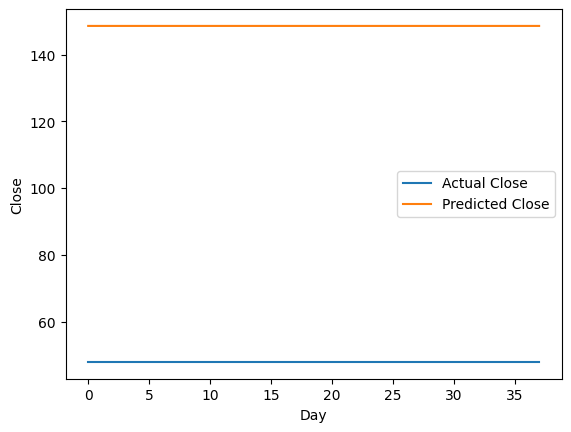

In [ ]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
# Extract closing prices
closing_prices = multi_data['Close']

# Handling missing data by forward filling
closing_prices.fillna(method='ffill', inplace=True)


<ipython-input-9-42c969341be5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_prices.fillna(method='ffill', inplace=True)


Kenneth trying:

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Dow Jones components
dowjones_comps = ["AAPL", "MSFT", "AMZN", "GOOGL", "JNJ", "PFE", "MRK", "UNH", "ABT", "PG", "KO", "PEP", "WMT", "HD", "GS", "JPM", "V", "AXP", "CRM", "DIS", "NFLX", "CMCSA", "T", "INTC", "NKE", "MCD", "SBUX", "CAT", "MMM", "BA", "HON", "UNP", "DOW", "IBM", "CSCO", "AAP", "TRV", "CVX", "XOM", "VZ", "MS", "RTX", "WBA"]

multi_data = yf.download(dowjones_comps, start="2018-04-05", end="2024-04-05")
data_aapl = multi_data['Close']['AAPL'].dropna()  # Select only 'Close' prices for 'AAPL'

# Create lagged features for LSTM
def create_lagged_features(series, n_lags):
    df = pd.DataFrame(series)
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = series.shift(i)
    df.dropna(inplace=True)  # Drop rows with NaN values which are the result of shifting
    return df

# Number of lagged days
n_lags = 7
data_aapl_prepared = create_lagged_features(data_aapl, n_lags)

# Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
data_aapl_scaled = scaler.fit_transform(data_aapl_prepared)  # Convert DataFrame to NumPy array and scale

data_aapl_scaled




[*********************100%%**********************]  43 of 43 completed


array([[-0.89656285, -0.89991544, -0.90173011, ..., -0.91430988,
        -0.91944636, -0.90585159],
       [-0.88911956, -0.89656285, -0.89991544, ..., -0.90446752,
        -0.91430988, -0.91944636],
       [-0.89034988, -0.88911956, -0.89656285, ..., -0.90695886,
        -0.90446752, -0.91430988],
       ...,
       [ 0.6398923 ,  0.65453285,  0.6723721 , ...,  0.66462137,
         0.68221451,  0.67101877],
       [ 0.64985766,  0.6398923 ,  0.65453285, ...,  0.650596  ,
         0.66462137,  0.68221451],
       [ 0.63964637,  0.64985766,  0.6398923 , ...,  0.69488654,
         0.650596  ,  0.66462137]])

In [ ]:
def prepare_stock_data(stock_symbol, data, n_lags):
    series = data['Close'][stock_symbol].dropna()
    df = create_lagged_features(series, n_lags)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_data = scaler.fit_transform(df)
    return scaled_data, scaler

n_lags = 7  # Number of days to look back
all_data_scaled = {}
all_scalers = {}

for stock in dowjones_comps:
    scaled_data, scaler = prepare_stock_data(stock, multi_data, n_lags)
    all_data_scaled[stock] = scaled_data
    all_scalers[stock] = scaler



In [ ]:
def split_data(data, train_ratio=0.9):
    num_train = int(len(data) * train_ratio)
    return data[:num_train], data[num_train:]

train_data = {}
test_data = {}

for stock, data in all_data_scaled.items():
    train, test = split_data(data)
    train_data[stock] = train
    test_data[stock] = test


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x shape: (batch_size, seq_length, input_size)
        out, _ = self.lstm(x)
        # After LSTM: out shape should be (batch_size, seq_length, hidden_size)
        out = self.fc(out[:, -1, :])  # Select the last time step output
        return out

# Ensuring input data is correctly shaped
def train_model(data, epochs=100, batch_size=16):
    model.train()
    # Reshape data to be 3D: [samples, time steps, features]
    inputs = torch.tensor(data[:, 1:]).float().unsqueeze(-1)  # Adding sequence length dimension
    targets = torch.tensor(data[:, 0]).float().unsqueeze(1)  # Ensure targets are 2D

    dataset = TensorDataset(inputs, targets)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    losses = [] # Initializes a list to store the losses
    for epoch in range(epochs):
        for inputs, targets in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')


input_size = 1  # As we have reshaped the input to be [samples, time steps, features] with features=1
hidden_size = 50
num_layers = 2

# Initializing model
model = StockLSTM(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the model on AAPL data
train_model(train_data['AAPL'])



Epoch 1, Loss: 0.009340327233076096
Epoch 2, Loss: 0.0028238268569111824
Epoch 3, Loss: 0.0020634362008422613
Epoch 4, Loss: 0.002228644210845232
Epoch 5, Loss: 0.001896219328045845
Epoch 6, Loss: 0.000558103492949158
Epoch 7, Loss: 0.0018862582510337234
Epoch 8, Loss: 0.0015253614401444793
Epoch 9, Loss: 0.00032827991526573896
Epoch 10, Loss: 0.0007093780441209674
Epoch 11, Loss: 0.004977576434612274
Epoch 12, Loss: 0.0020021109376102686
Epoch 13, Loss: 0.0008485447033308446
Epoch 14, Loss: 0.001131577999331057
Epoch 15, Loss: 0.0019731405191123486
Epoch 16, Loss: 0.002284514717757702
Epoch 17, Loss: 0.0018189868424087763
Epoch 18, Loss: 0.003719210159033537
Epoch 19, Loss: 0.0019835401326417923
Epoch 20, Loss: 0.0028491185512393713
Epoch 21, Loss: 0.0015223408117890358
Epoch 22, Loss: 0.0007372485706582665
Epoch 23, Loss: 0.0025219295639544725
Epoch 24, Loss: 0.0013600699603557587
Epoch 25, Loss: 0.0005187546485103667
Epoch 26, Loss: 0.00239479704760015
Epoch 27, Loss: 0.002459920011

In [ ]:
def evaluate_model(data, batch_size=16):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
        inputs = torch.tensor(data[:, 1:]).float().unsqueeze(-1)  # Reshape and convert data
        targets = torch.tensor(data[:, 0]).float().unsqueeze(1)

        dataset = TensorDataset(inputs, targets)
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

        predictions = []
        actuals = []
        for inputs, targets in loader:
            outputs = model(inputs)
            predictions.append(outputs)
            actuals.append(targets)

        predictions = torch.cat(predictions).view(-1)
        actuals = torch.cat(actuals).view(-1)
        loss = criterion(predictions, actuals)
        print(f'Test Loss: {loss.item()}')
        return predictions.numpy(), actuals.numpy()

# Evaluating on AAPL test data
predictions, actuals = evaluate_model(test_data['AAPL'])


Test Loss: 0.001026064739562571


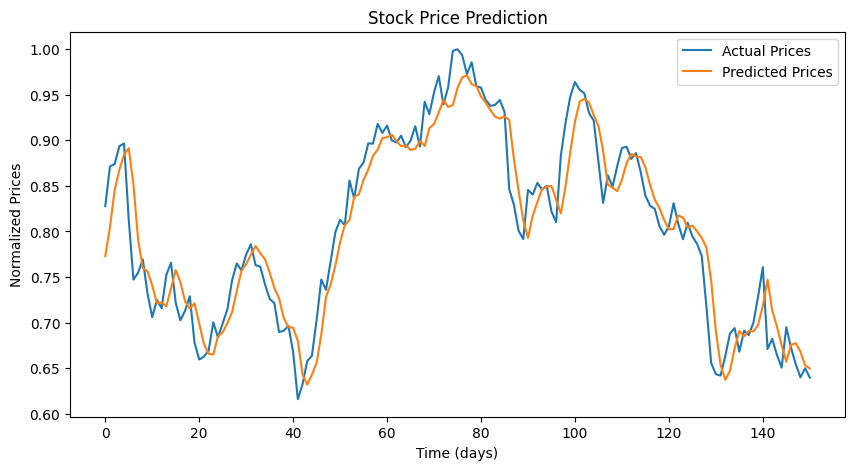

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(actuals, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time (days)')
plt.ylabel('Normalized Prices')
plt.legend()
plt.show()


In [ ]:
# Inverse scaling for the test dataset to view the actual prices
scaler = all_scalers['AAPL']
test_data_unscaled = scaler.inverse_transform(test_data['AAPL'])

# Converting to DataFrame
test_data_df = pd.DataFrame(test_data_unscaled, columns=[f'Close(t+1)'] + [f'Close(t-{i})' for i in range(1, n_lags + 1)])
test_data_df



,Close(t+1),Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
0,184.119995,180.190002,178.610001,176.380005,181.119995,177.229996,175.839996,174.490005
1,187.649994,184.119995,180.190002,178.610001,176.380005,181.119995,177.229996,175.839996
2,187.869995,187.649994,184.119995,180.190002,178.610001,176.380005,181.119995,177.229996
3,189.460007,187.869995,187.649994,184.119995,180.190002,178.610001,176.380005,181.119995
4,189.699997,189.460007,187.869995,187.649994,184.119995,180.190002,178.610001,176.380005
...,...,...,...,...,...,...,...,...
146,171.479996,173.309998,169.710007,170.850006,172.279999,171.369995,178.669998,176.080002
147,170.029999,171.479996,173.309998,169.710007,170.850006,172.279999,171.369995,178.669998
148,168.839996,170.029999,171.479996,173.309998,169.710007,170.850006,172.279999,171.369995
149,169.649994,168.839996,170.029999,171.479996,173.309998,169.710007,170.850006,172.279999


Training and evaluating model for AAPL
Test Loss: 0.0013145426055416465
Test Loss for AAPL: 0.0013145426055416465


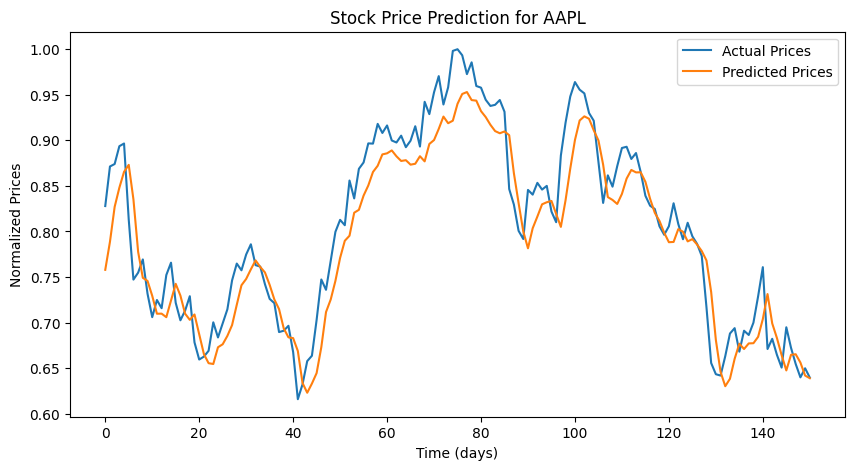

Training and evaluating model for MSFT
Test Loss: 0.029805215075612068
Test Loss for MSFT: 0.029805215075612068


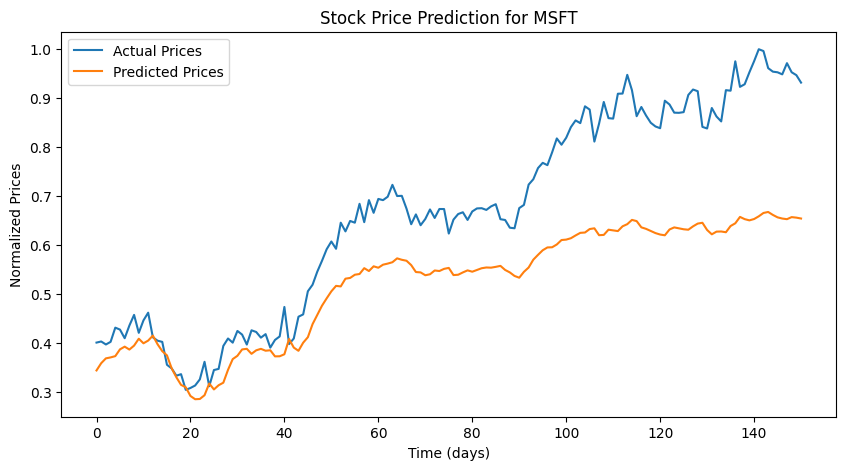

Training and evaluating model for AMZN
Test Loss: 0.0021212652791291475
Test Loss for AMZN: 0.0021212652791291475


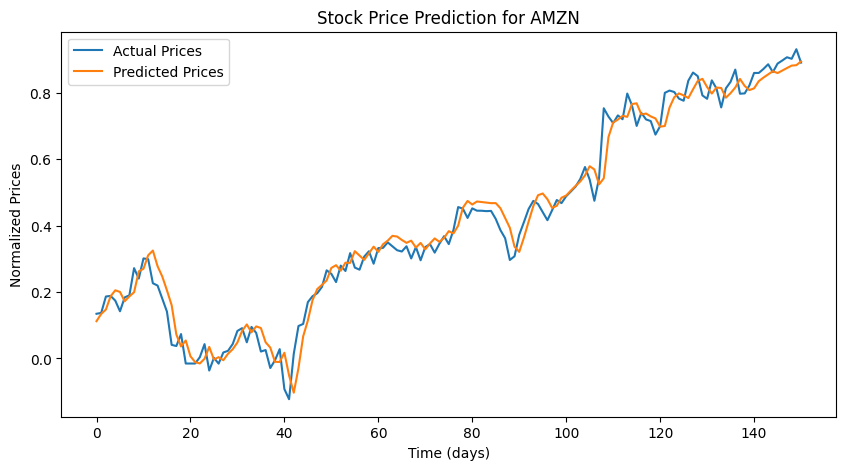

Training and evaluating model for GOOGL
Test Loss: 0.003110365942120552
Test Loss for GOOGL: 0.003110365942120552


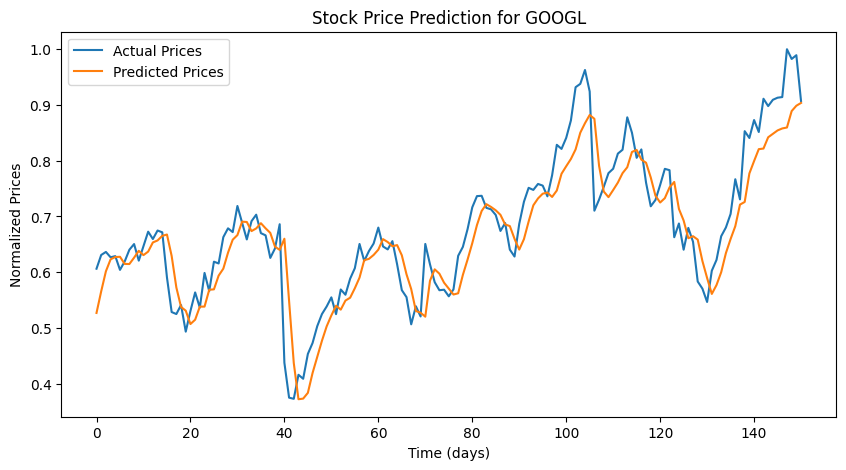

Training and evaluating model for JNJ
Test Loss: 0.0018339342204853892
Test Loss for JNJ: 0.0018339342204853892


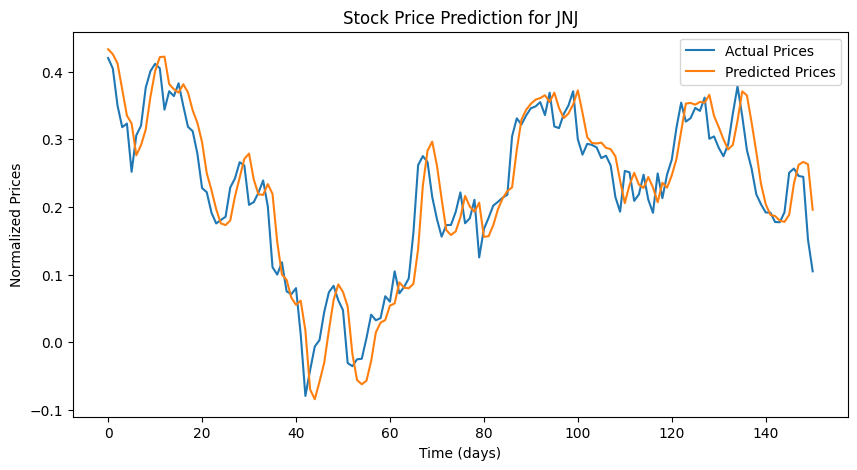

Training and evaluating model for PFE
Test Loss: 0.0015074391849339008
Test Loss for PFE: 0.0015074391849339008


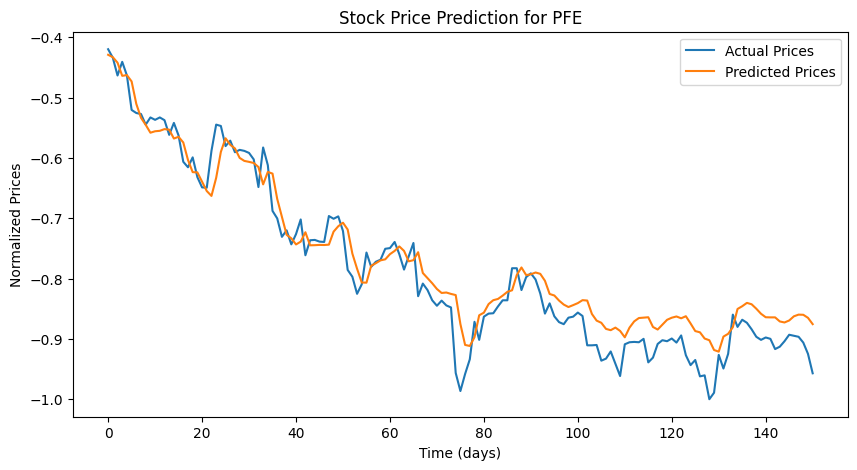

Training and evaluating model for MRK
Test Loss: 0.005083307158201933
Test Loss for MRK: 0.005083307158201933


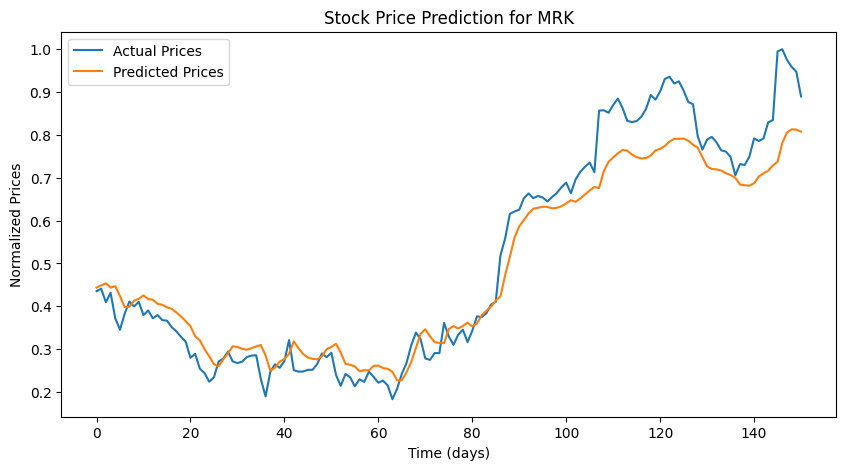

Training and evaluating model for UNH
Test Loss: 0.0016162310494109988
Test Loss for UNH: 0.0016162310494109988


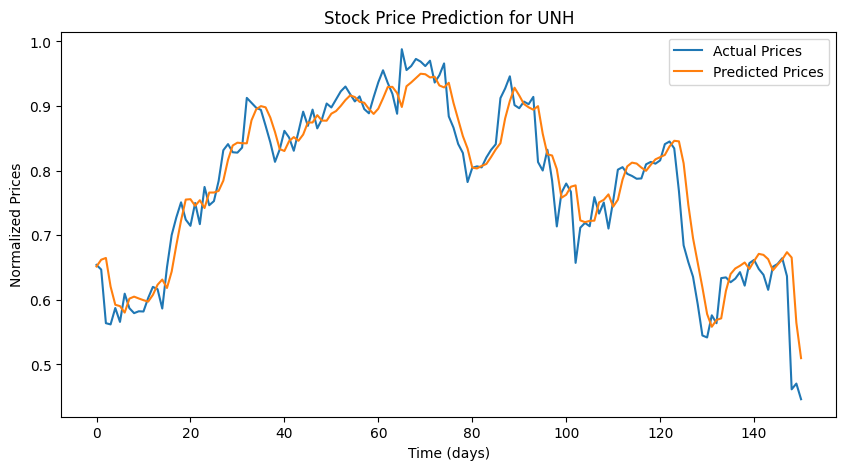

Training and evaluating model for ABT
Test Loss: 0.0011052268091589212
Test Loss for ABT: 0.0011052268091589212


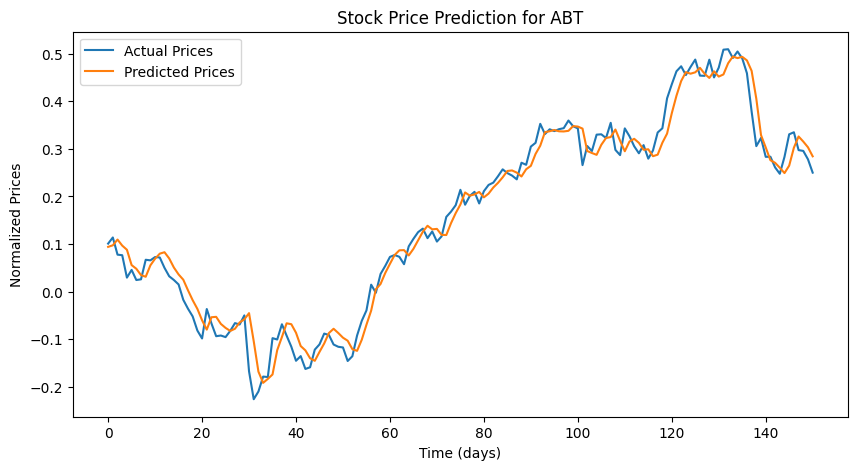

Training and evaluating model for PG
Test Loss: 0.0010264709126204252
Test Loss for PG: 0.0010264709126204252


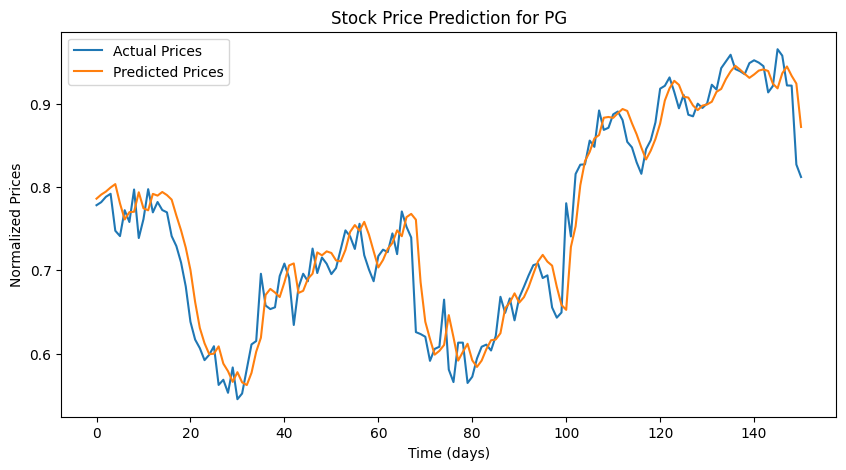

Training and evaluating model for KO
Test Loss: 0.0013481912901625037
Test Loss for KO: 0.0013481912901625037


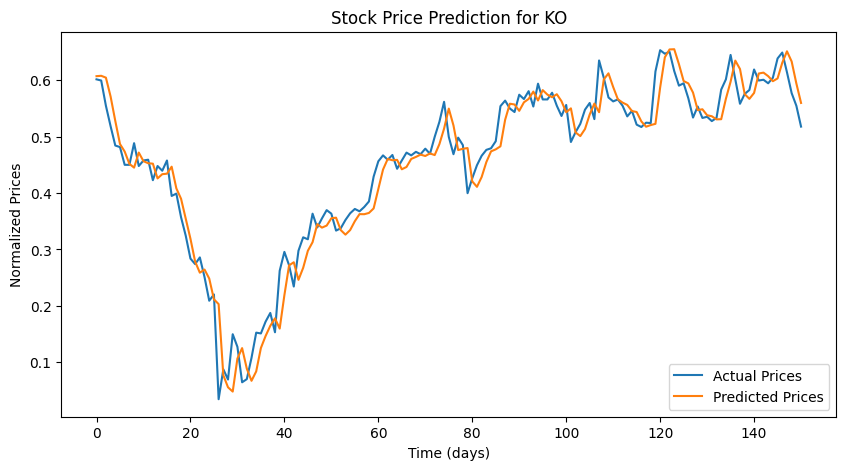

Training and evaluating model for PEP
Test Loss: 0.001811531255953014
Test Loss for PEP: 0.001811531255953014


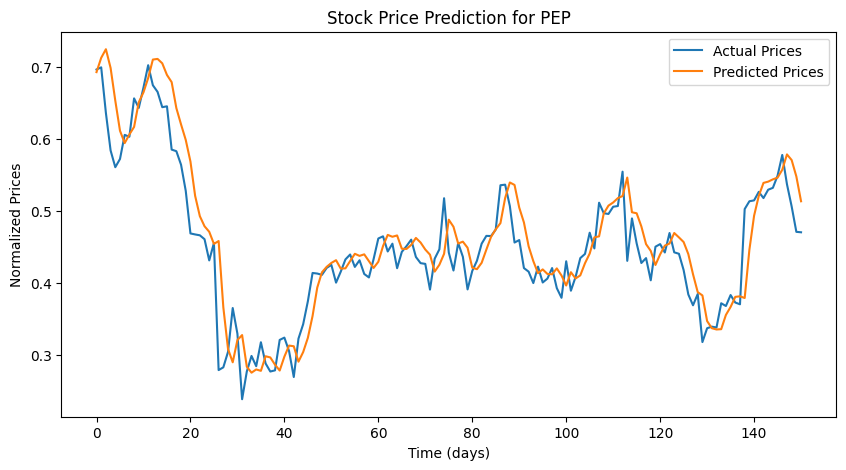

Training and evaluating model for WMT
Test Loss: 0.018601641058921814
Test Loss for WMT: 0.018601641058921814


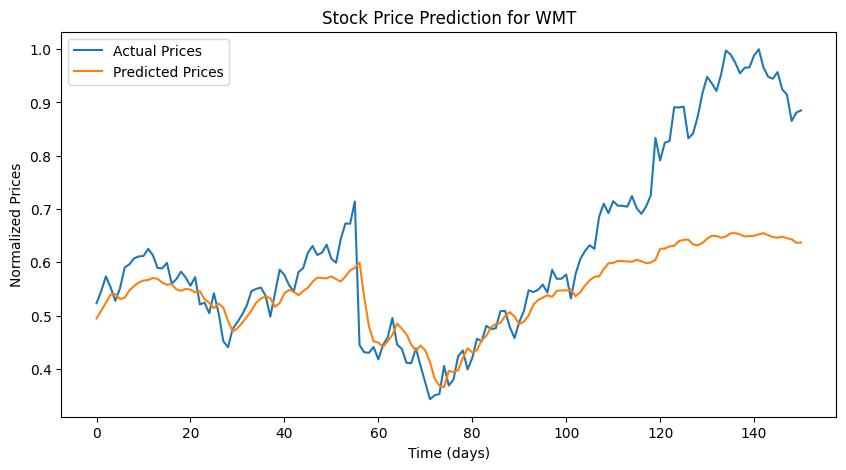

Training and evaluating model for HD
Test Loss: 0.002373837400227785
Test Loss for HD: 0.002373837400227785


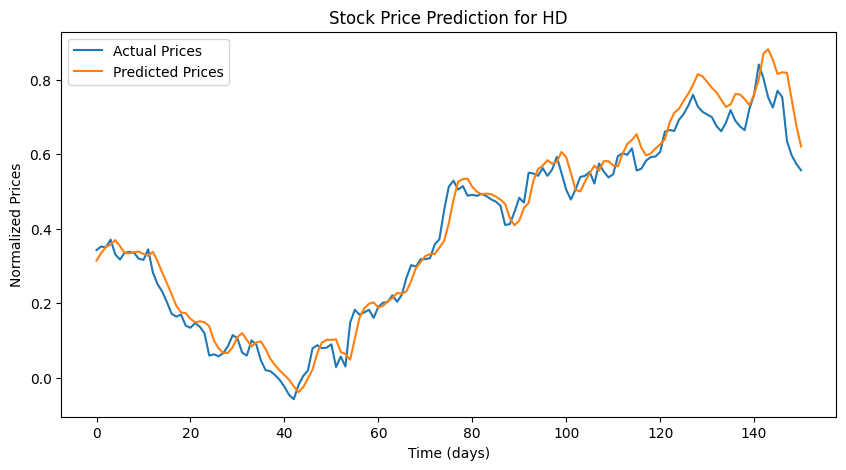

Training and evaluating model for GS
Test Loss: 0.0013960700016468763
Test Loss for GS: 0.0013960700016468763


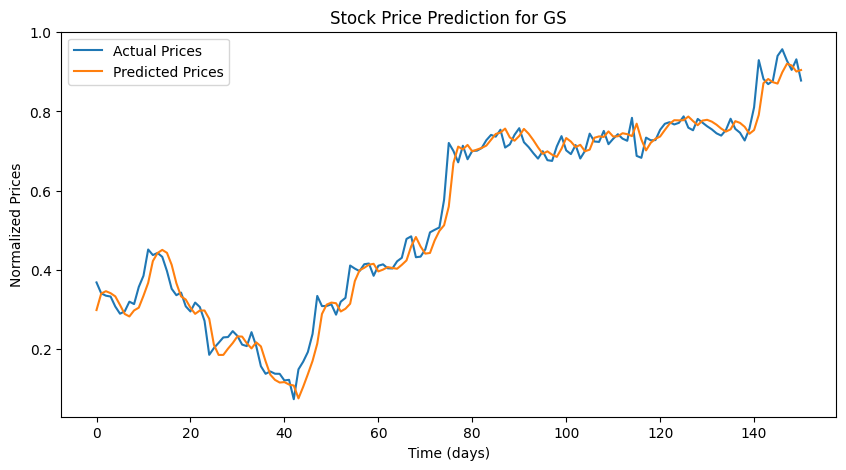

Training and evaluating model for JPM
Test Loss: 0.011083340272307396
Test Loss for JPM: 0.011083340272307396


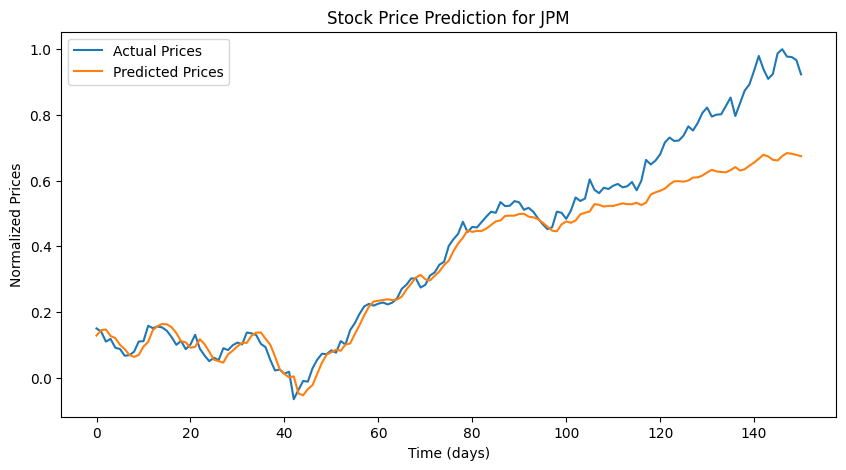

Training and evaluating model for V
Test Loss: 0.012704669497907162
Test Loss for V: 0.012704669497907162


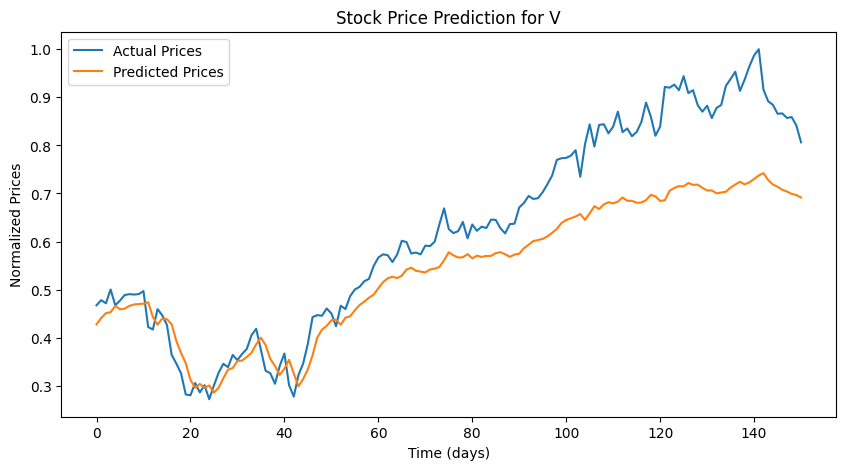

Training and evaluating model for AXP
Test Loss: 0.008244517259299755
Test Loss for AXP: 0.008244517259299755


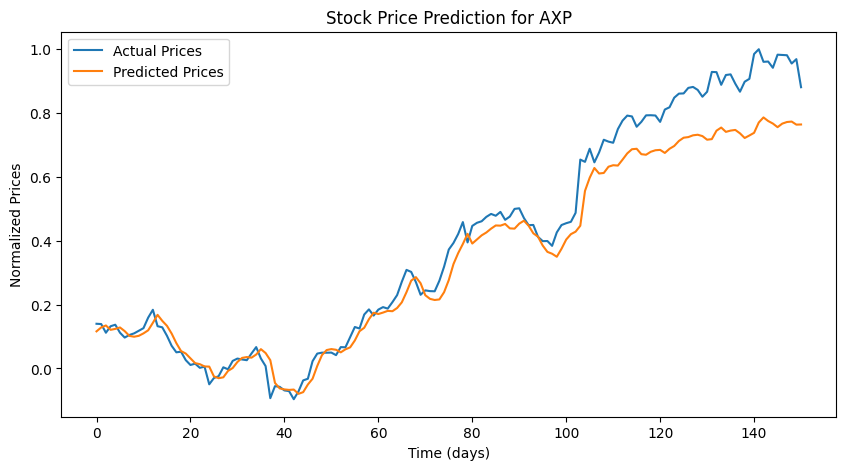

Training and evaluating model for CRM
Test Loss: 0.007860792800784111
Test Loss for CRM: 0.007860792800784111


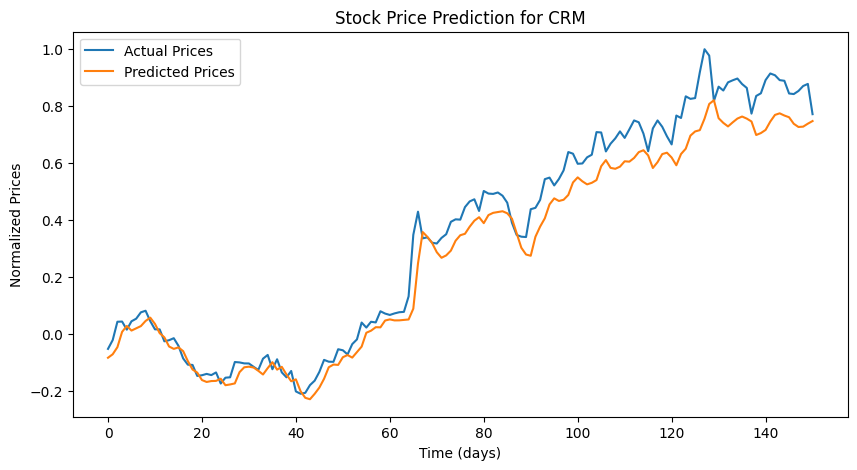

Training and evaluating model for DIS
Test Loss: 0.0015337372897192836
Test Loss for DIS: 0.0015337372897192836


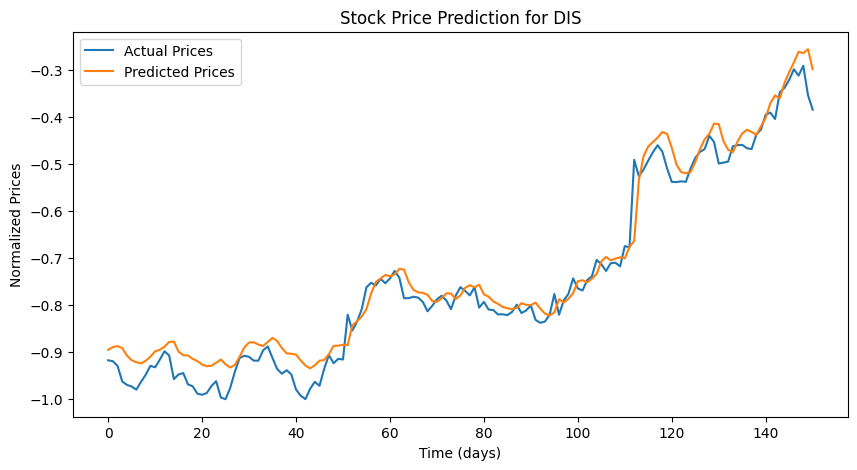

Training and evaluating model for NFLX
Test Loss: 0.001836402341723442
Test Loss for NFLX: 0.001836402341723442


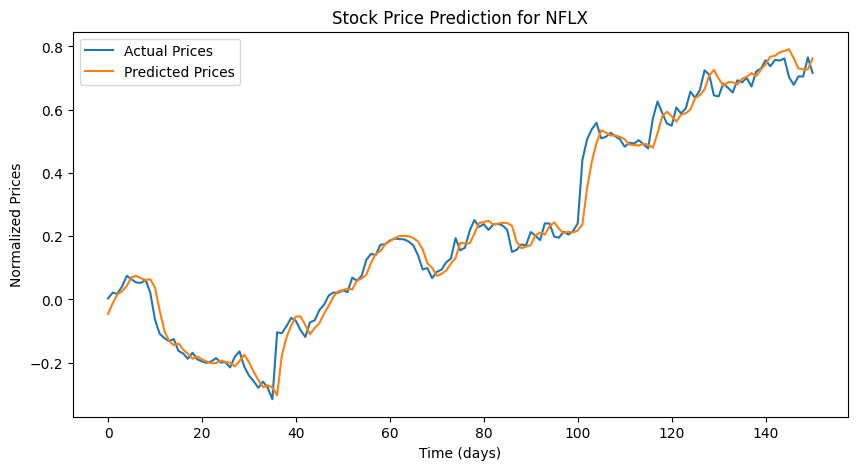

Training and evaluating model for CMCSA
Test Loss: 0.002169098472222686
Test Loss for CMCSA: 0.002169098472222686


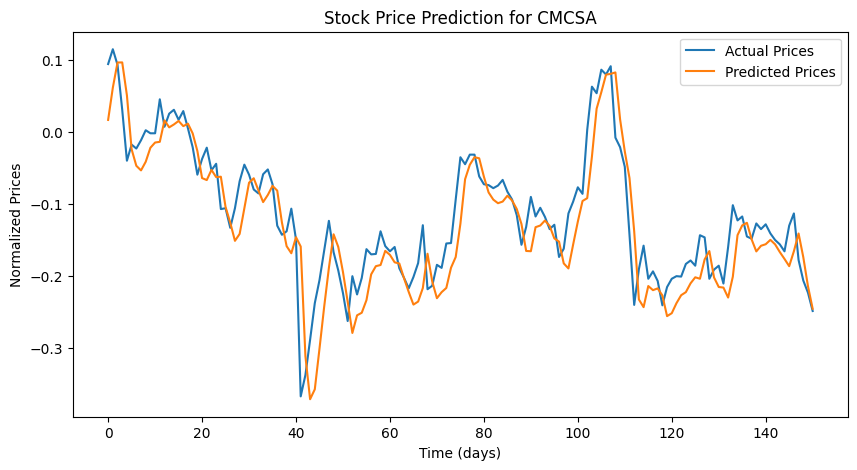

Training and evaluating model for T
Test Loss: 0.001159879844635725
Test Loss for T: 0.001159879844635725


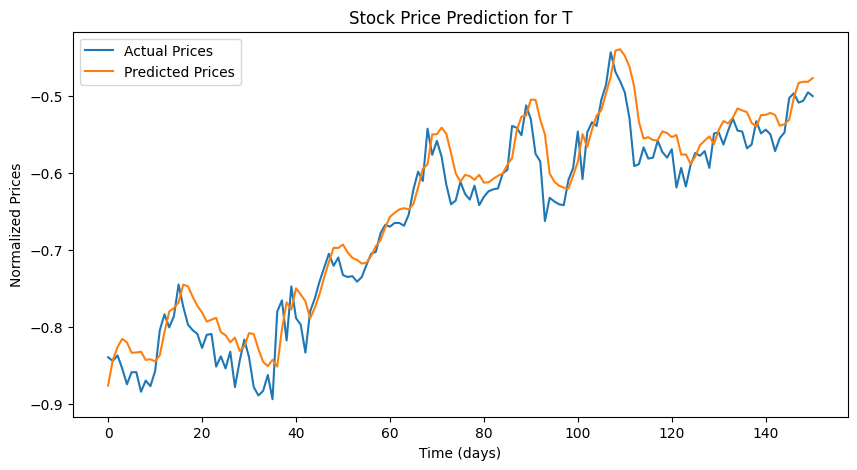

Training and evaluating model for INTC
Test Loss: 0.0031765196472406387
Test Loss for INTC: 0.0031765196472406387


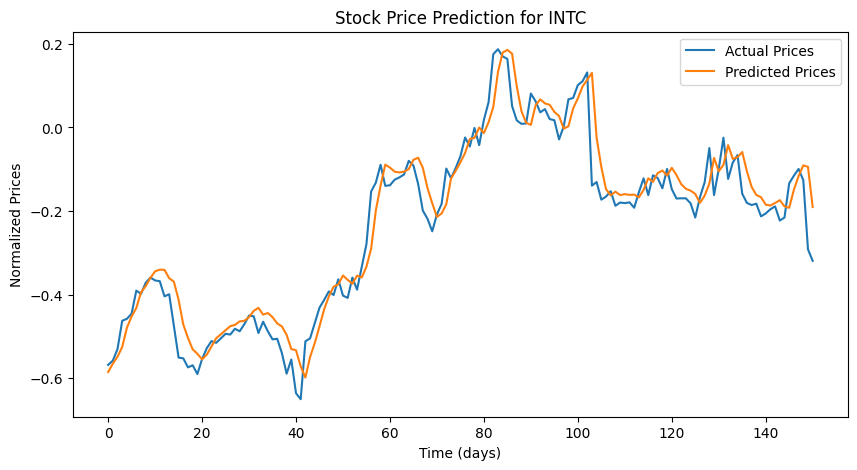

Training and evaluating model for NKE
Test Loss: 0.0014691376127302647
Test Loss for NKE: 0.0014691376127302647


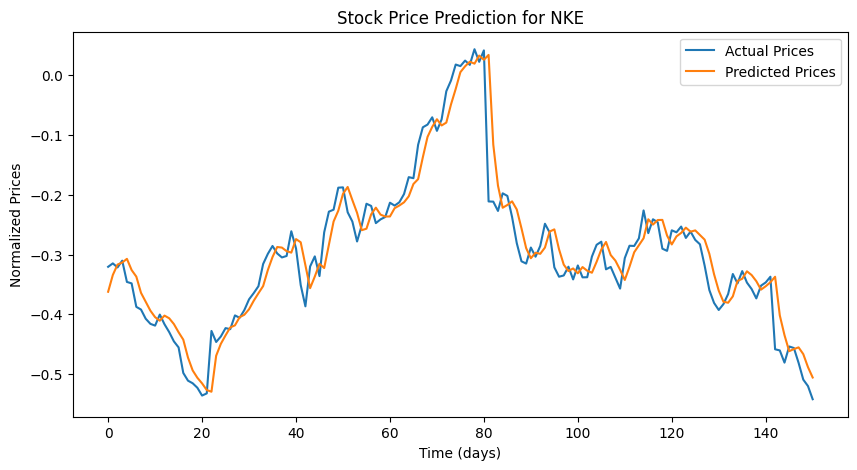

Training and evaluating model for MCD
Test Loss: 0.0030288496054708958
Test Loss for MCD: 0.0030288496054708958


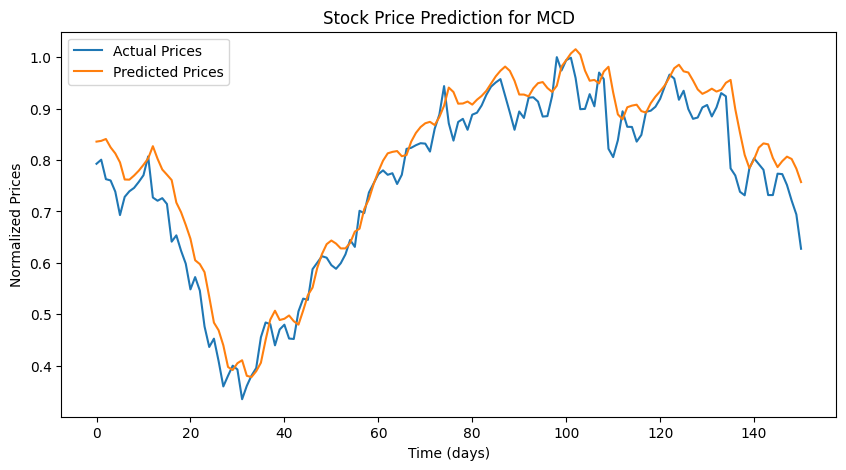

Training and evaluating model for SBUX
Test Loss: 0.0019727095495909452
Test Loss for SBUX: 0.0019727095495909452


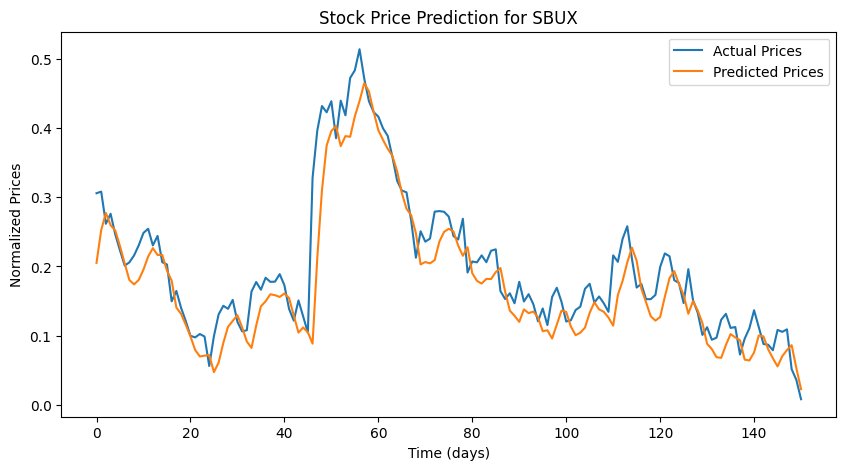

Training and evaluating model for CAT
Test Loss: 0.01987031102180481
Test Loss for CAT: 0.01987031102180481


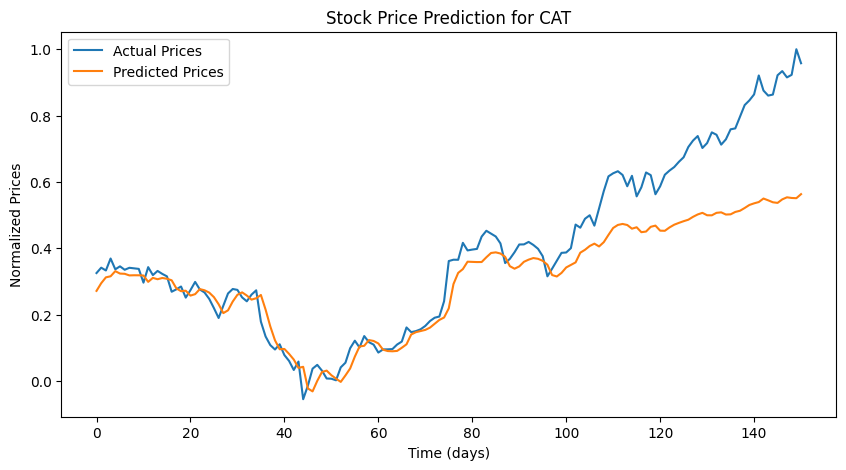

Training and evaluating model for MMM
Test Loss: 0.0017807327676564455
Test Loss for MMM: 0.0017807327676564455


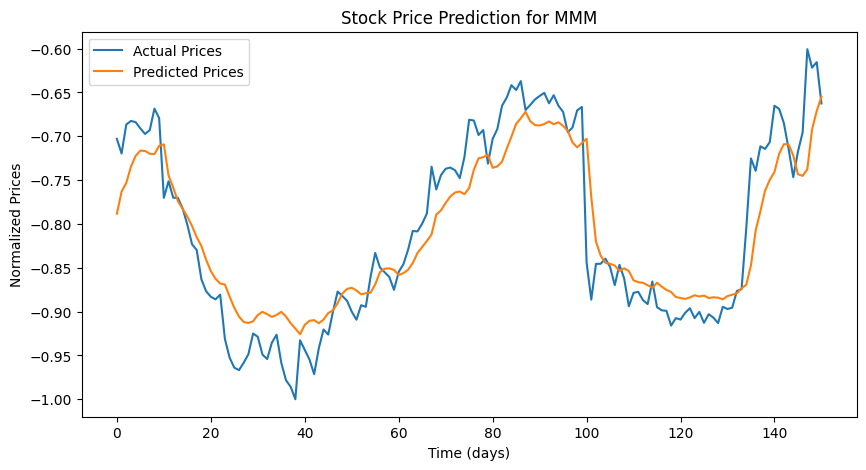

Training and evaluating model for BA
Test Loss: 0.0007138409418985248
Test Loss for BA: 0.0007138409418985248


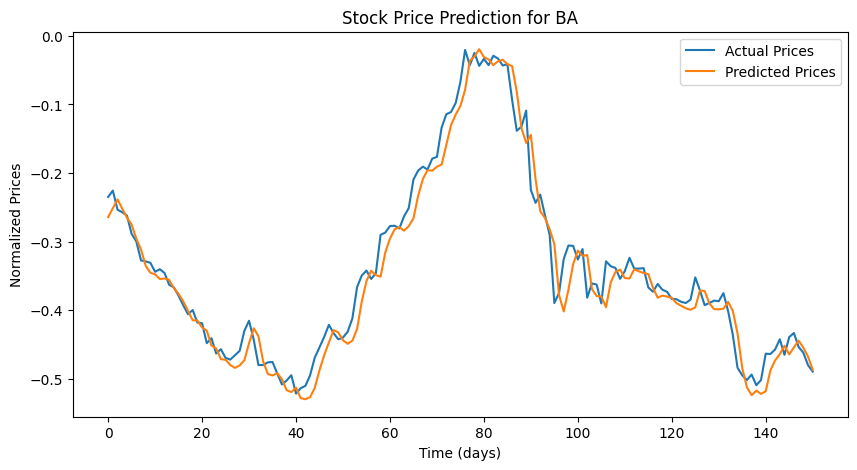

Training and evaluating model for HON
Test Loss: 0.001122429152019322
Test Loss for HON: 0.001122429152019322


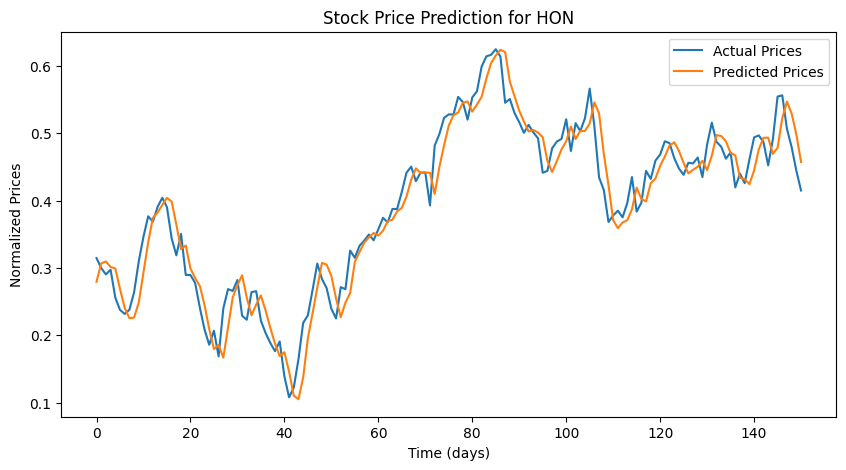

Training and evaluating model for UNP
Test Loss: 0.0019557015039026737
Test Loss for UNP: 0.0019557015039026737


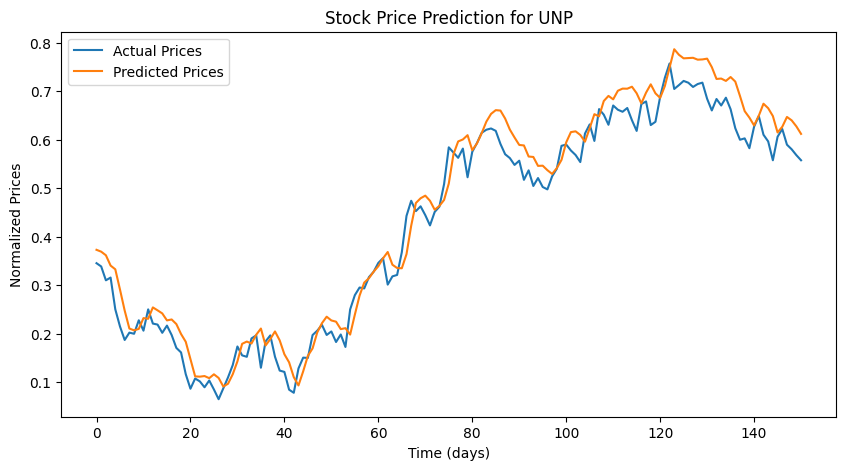

Training and evaluating model for DOW
Test Loss: 0.000792382750660181
Test Loss for DOW: 0.000792382750660181


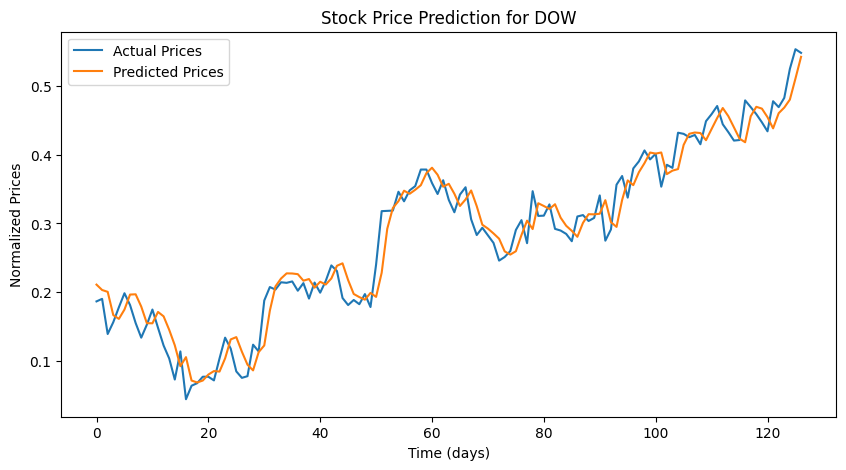

Training and evaluating model for IBM
Test Loss: 0.2016105055809021
Test Loss for IBM: 0.2016105055809021


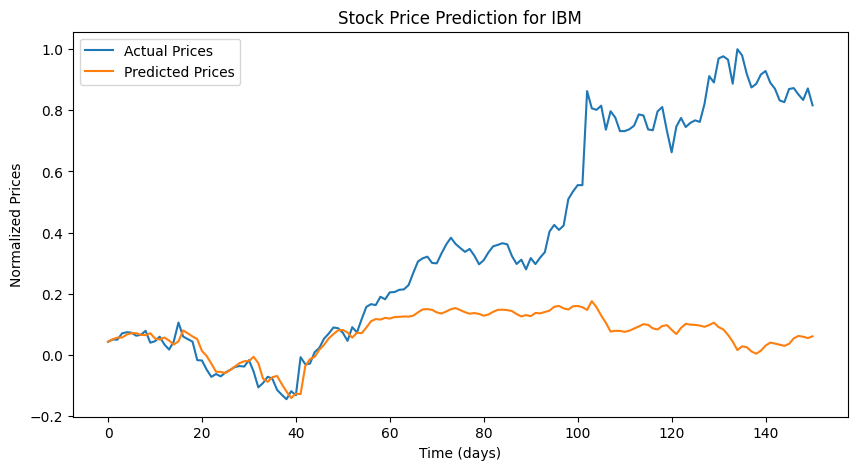

Training and evaluating model for CSCO
Test Loss: 0.002014949219301343
Test Loss for CSCO: 0.002014949219301343


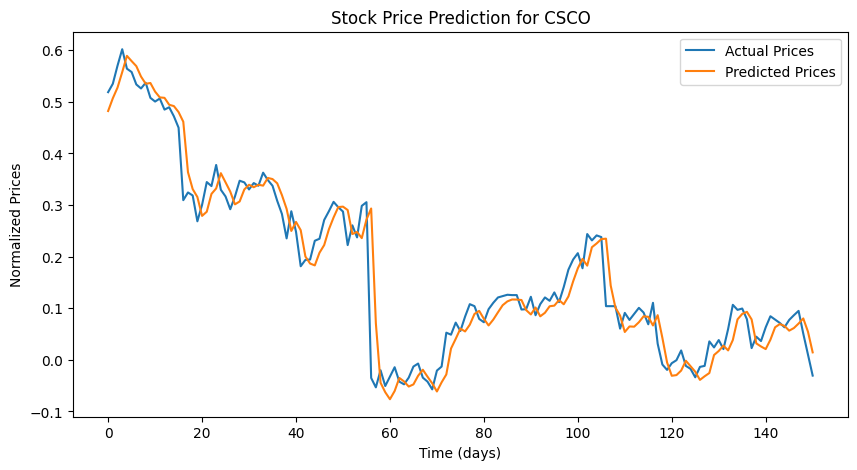

Training and evaluating model for AAP
Test Loss: 0.0037439363077282906
Test Loss for AAP: 0.0037439363077282906


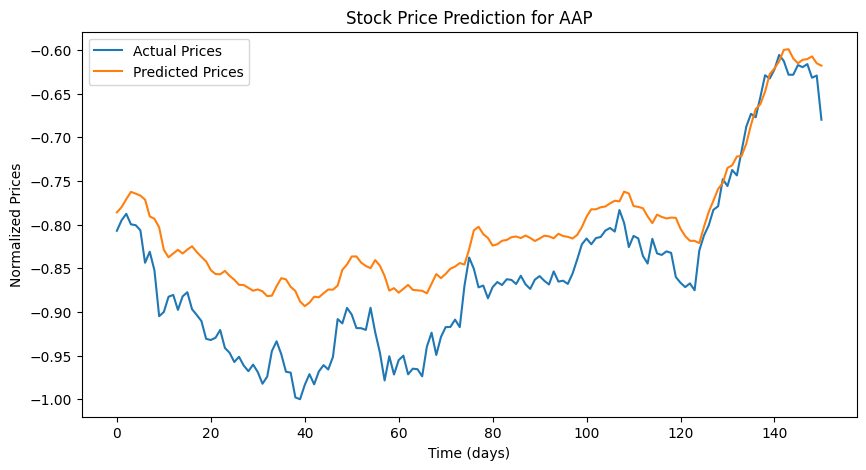

Training and evaluating model for TRV
Test Loss: 0.020920701324939728
Test Loss for TRV: 0.020920701324939728


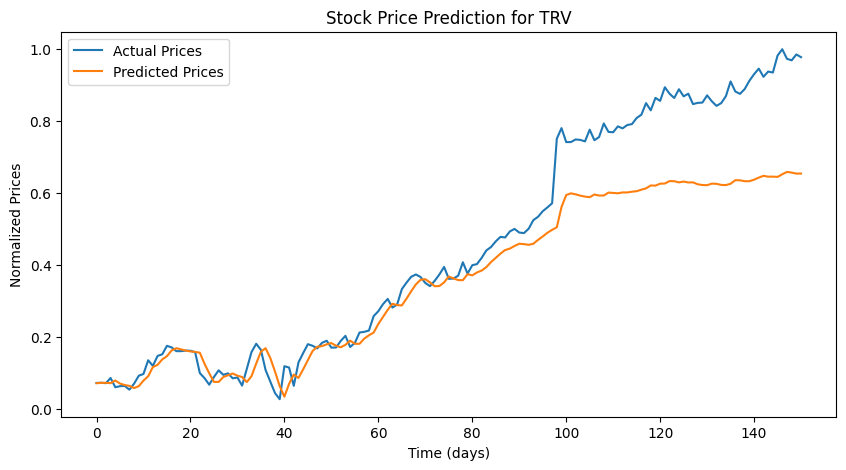

Training and evaluating model for CVX
Test Loss: 0.001120072673074901
Test Loss for CVX: 0.001120072673074901


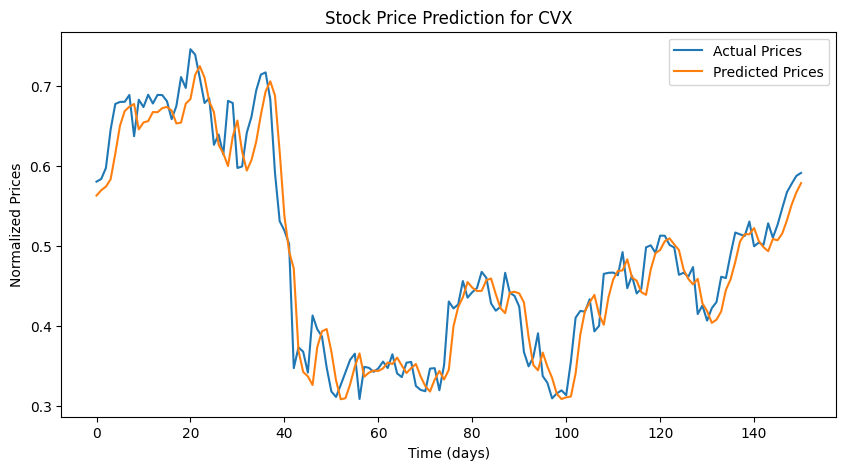

Training and evaluating model for XOM
Test Loss: 0.0017166098114103079
Test Loss for XOM: 0.0017166098114103079


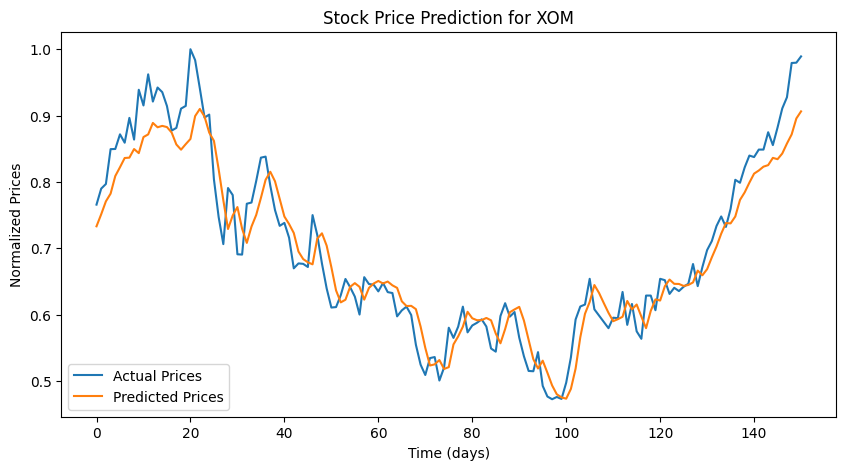

Training and evaluating model for VZ
Test Loss: 0.004206098150461912
Test Loss for VZ: 0.004206098150461912


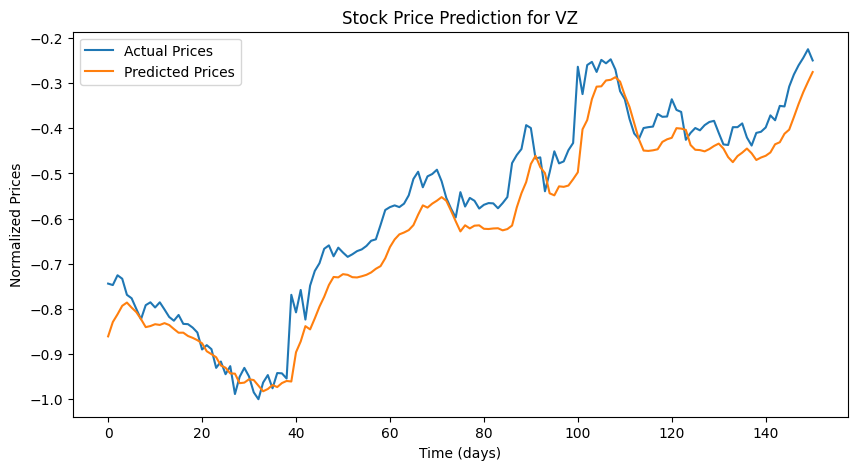

Training and evaluating model for MS
Test Loss: 0.0015436625108122826
Test Loss for MS: 0.0015436625108122826


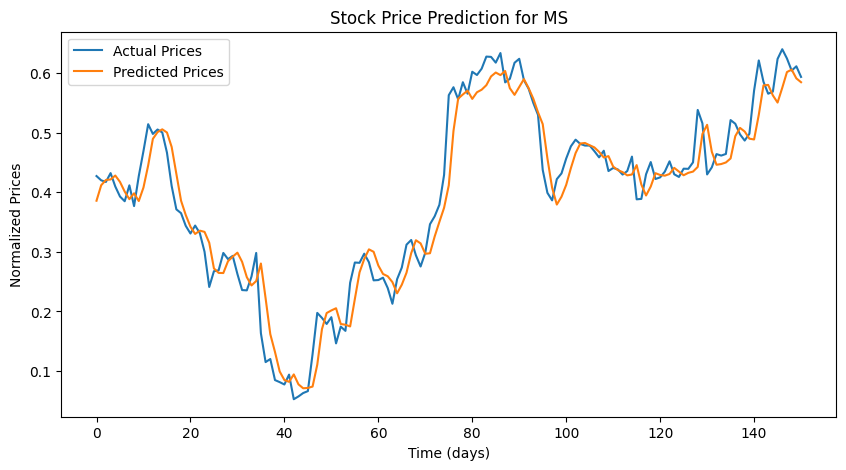

Training and evaluating model for RTX
Test Loss: 0.0022362153977155685
Test Loss for RTX: 0.0022362153977155685


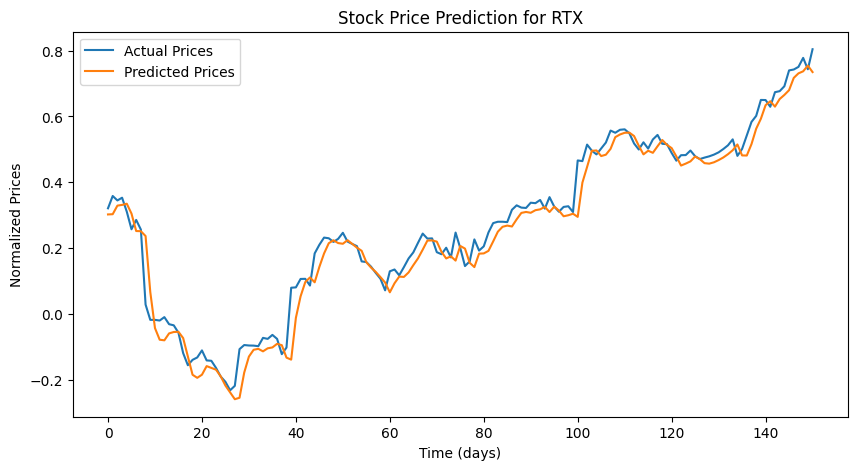

Training and evaluating model for WBA
Test Loss: 0.001621978241018951
Test Loss for WBA: 0.001621978241018951


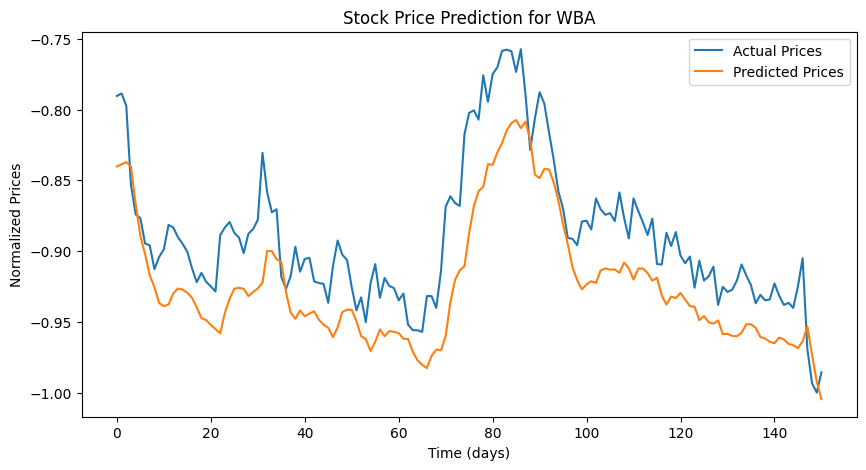

In [ ]:
# Storage for models and results
all_models = {}
all_predictions = {}
all_actuals = {}
all_test_losses = {}

for stock in dowjones_comps:
    print(f'Training and evaluating model for {stock}')

    # Preparing the data
    train = torch.tensor(train_data[stock][:, 1:]).float().unsqueeze(-1)
    targets = torch.tensor(train_data[stock][:, 0]).float().unsqueeze(1)
    dataset = TensorDataset(train, targets)
    loader = DataLoader(dataset, batch_size=16, shuffle=True)

    # Initializing model
    model = StockLSTM(input_size, hidden_size, num_layers)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    # Training the model
    model.train()
    for epoch in range(100):
        for inputs, targets in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Storing the trained model
    all_models[stock] = model

    # Evaluating the model
    predictions, actuals = evaluate_model(test_data[stock])
    all_predictions[stock] = predictions
    all_actuals[stock] = actuals

    # Calculating test loss
    test_loss = criterion(torch.tensor(predictions), torch.tensor(actuals))
    all_test_losses[stock] = test_loss.item()
    print(f'Test Loss for {stock}: {test_loss.item()}')

    plt.figure(figsize=(10, 5))
    plt.plot(actuals, label='Actual Prices')
    plt.plot(predictions, label='Predicted Prices')
    plt.title(f'Stock Price Prediction for {stock}')
    plt.xlabel('Time (days)')
    plt.ylabel('Normalized Prices')
    plt.legend()
    plt.show()


[*********************100%%**********************]  4 of 4 completed


Training and evaluating model for AAPL
Loss for AAPL: 0.0010595933999866247


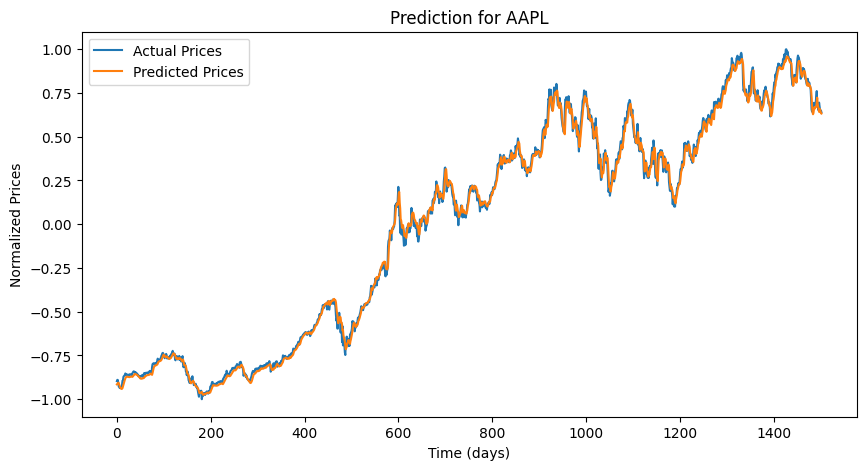

Training and evaluating model for MSFT
Loss for MSFT: 0.0011653242399916053


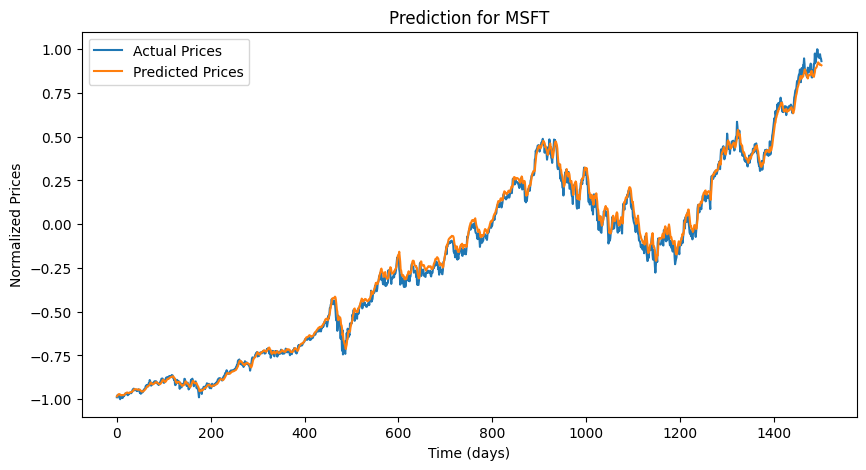

Training and evaluating model for AMZN
Loss for AMZN: 0.002714309375733137


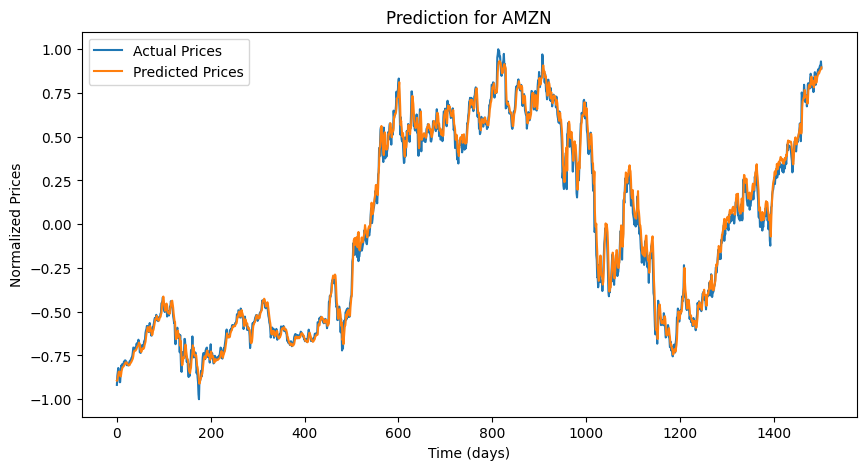

Training and evaluating model for GOOGL
Loss for GOOGL: 0.0017146128229796886


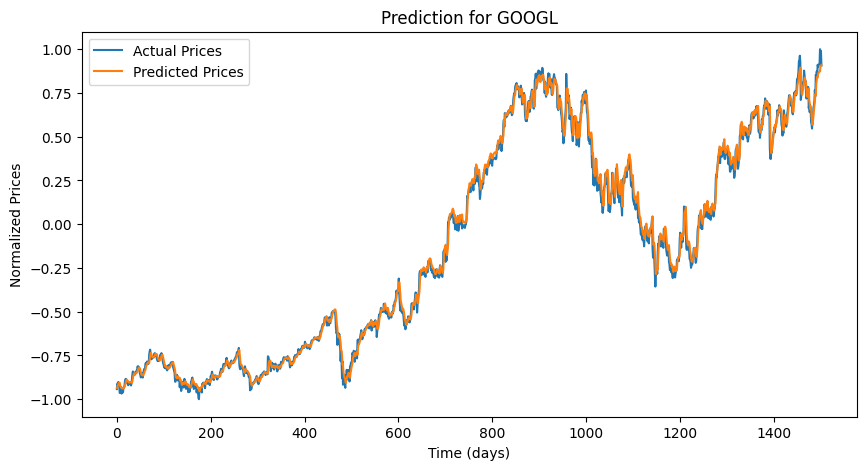

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# LSTM model with hyperparameters for dropout
class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout_p=0.2):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_p)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameter dictionary
hyperparams = {
    'input_size': 1,
    'hidden_size': 50,
    'num_layers': 2,
    'dropout': 0.2,
    'learning_rate': 0.001,
    'epochs': 100,
    'batch_size': 16
}

# Training function
def train_model(data, hyperparams, model, optimizer, criterion):
    model.train()
    inputs = torch.tensor(data[:, 1:]).float().unsqueeze(-1)
    targets = torch.tensor(data[:, 0]).float().unsqueeze(1)
    dataset = TensorDataset(inputs, targets)
    loader = DataLoader(dataset, batch_size=hyperparams['batch_size'], shuffle=True)
    for epoch in range(hyperparams['epochs']):
        for inputs, targets in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

# Evaluating function
def evaluate_model(data, model, criterion):
    model.eval()
    with torch.no_grad():
        inputs = torch.tensor(data[:, 1:]).float().unsqueeze(-1)
        targets = torch.tensor(data[:, 0]).float().unsqueeze(1)
        dataset = TensorDataset(inputs, targets)
        loader = DataLoader(dataset, batch_size=16, shuffle=False)
        predictions = []
        actuals = []
        for inputs, targets in loader:
            outputs = model(inputs)
            predictions.append(outputs)
            actuals.append(targets)
        predictions = torch.cat(predictions).view(-1)
        actuals = torch.cat(actuals).view(-1)
        loss = criterion(predictions, actuals)
        return predictions.numpy(), actuals.numpy(), loss.item()

# Subset of Dow Jones companies
dowjones_comps = ["AAPL", "MSFT", "AMZN", "GOOGL"]

multi_data = yf.download(dowjones_comps, start="2018-04-05", end="2024-04-05")

# Iterate over stocks
for stock in dowjones_comps:
    print(f'Training and evaluating model for {stock}')
    model = StockLSTM(hyperparams['input_size'], hyperparams['hidden_size'], hyperparams['num_layers'], hyperparams['dropout'])
    optimizer = torch.optim.Adam(model.parameters(), lr=hyperparams['learning_rate'])
    criterion = nn.MSELoss()

    # Training and Evaluation
    train_data, _ = prepare_stock_data(stock, multi_data, 7)
    train_model(train_data, hyperparams, model, optimizer, criterion)
    predictions, actuals, loss = evaluate_model(train_data, model, criterion)

    print(f'Loss for {stock}: {loss}')

    plt.figure(figsize=(10, 5))
    plt.plot(actuals, label='Actual Prices')
    plt.plot(predictions, label='Predicted Prices')
    plt.title(f'Prediction for {stock}')
    plt.xlabel('Time (days)')
    plt.ylabel('Normalized Prices')
    plt.legend()
    plt.show()



